# Прототип модели машинного обучения для «Цифры».

Компания разрабатывает решения для эффективной работы промышленных предприятий.


**Цель:**

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

**Задачи:**

- 1) Подготовить данные;
- 2) Провести исследовательский анализ данных;
- 3) Построить и обучить модель.

**Используемые библиотеки:**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t, mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

Глобальные переменные:

In [52]:
state = np.random.RandomState(12345)

## Подготовка данных

### Загрузка данных

In [76]:
try:
    df_train = pd.read_csv('gold_industry_train.csv')
except:
    df_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [77]:
try:
    df_test = pd.read_csv('gold_industry_test.csv')
except:
    df_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [78]:
try:
    df_full = pd.read_csv('gold_industry_full.csv')
except:
    df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [79]:
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [80]:
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [81]:
df_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [82]:
df_train.shape[0] + df_test.shape[0] == df_full.shape[0]

True

Можно сделать вывод, что при разделении датасета `df_full` не были потеряны какие-либо строки

In [83]:
print(df_full.duplicated().sum())
df_full.isna().sum().sort_values(ascending=False)

0


secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.output.tail_sol                        0
primary_cleaner.input.feed_size                0
rougher.input.feed_au                          0
primary_cleaner.output.concentrate_au          0
date                                           0
Length: 87, dtype: int64

Явных дубликатов нет, однако есть пропуски, которые будут мешать при обучении модели

In [84]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Все столбцы, кроме первого имеют верный тип данных.

In [85]:
df_train['date'] = pd.to_datetime(df_train['date'], format="%Y-%m-%d\n%H:%M:%S")
df_test['date'] = pd.to_datetime(df_test['date'], format="%Y-%m-%d\n%H:%M:%S")
df_full['date'] = pd.to_datetime(df_full['date'], format="%Y-%m-%d\n%H:%M:%S")

Создадим дополнительные признаки, которые потом нам помогут

In [86]:
df_train['year'] = pd.DatetimeIndex(df_train['date']).year
df_train['day'] = pd.DatetimeIndex(df_train['date']).day
df_train['month'] = pd.DatetimeIndex(df_train['date']).month

df_test['year'] = pd.DatetimeIndex(df_test['date']).year
df_test['day'] = pd.DatetimeIndex(df_test['date']).day
df_test['month'] = pd.DatetimeIndex(df_test['date']).month

### Проверка расчета эффективности обогащения

In [87]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [88]:
def recovery_rate(C, F, T):
    rec = (C * (F - T)) / (F * (C - T))
    return rec * 100

In [89]:
train_rougher_output_rec = recovery_rate(C, F, T)

In [90]:
MAE = mean_absolute_error(df_train['rougher.output.recovery'], train_rougher_output_rec)
print(f'MAE -- {MAE}')

MAE -- 9.83758577644259e-15


#### **Вывод:**

Расчет эффективности обогащения был составлен верно! Можно двигаться дальше.

### Анализ признаков, недоступных в тестовой выборке

Найдем какие именно именно признаки отсутствуют в тестовом датасете:

In [91]:
feat_categories = list(set(df_train.columns.tolist()) - set(df_test.columns.tolist()))
feat_categories

['primary_cleaner.output.tail_ag',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.recovery',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_sol',
 'rougher.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_au',
 'final.o

#### Вывод:
Мы видим, что это все признаки, которые довольно сильно связаны с целевым признаком, так как все они `output` и `calculation`, если их оставить в тестовом, то мы можем получить переобучение, модель просто запомнит наши данные.

### Предобработка данных

Борьба с пропусками:

Создадим список со столбцами, в которых есть пропуски, чтобы не перебирать в дальнейшем все столбцы:

In [92]:
nans_cols = df_train.isna().sum().sort_values(ascending=False).head(39).index.tolist()

Код ужасен, вообще не оптимизированный, но придумать, что-то лучше я не додумался) Далее создадим таблицу сгруппрованную по году, месяцу и дню для каждого признака, по сгруппированным данным посчитаем среднее. Данная таблица будет использоваться для заполнения пропусков опираясь не на все данные по всему датасету, а конкретно по одному дню, на мой взгляд это меньше всего искажает исходные данные

In [93]:
mean_table = df_train.groupby(['year', 'month', 'day'])[nans_cols].median()
mean_table.head()

secondary_cleaner.output.tail_sol  \
year month day                                      
2016 1     15                            9.871105   
           16                           10.289325   
           17                            9.129688   
           18                           10.162496   
           19                           12.694600   

                rougher.state.floatbank10_e_air  \
year month day                                    
2016 1     15                       1400.824089   
           16                       1201.806327   
           17                       1200.273734   
           18                       1199.840078   
           19                       1199.307663   

                rougher.input.floatbank11_xanthate  \
year month day                                       
2016 1     15                             6.809559   
           16                             7.301632   
           17                             7.499631   
           18                             7.593476   
           19                             7.801926   

                primary_cleaner.output.concentrate_sol  \
year month day                                           
2016 1     15                                18.363151   
           16                                19.121484   
           17                                18.055081   
           18                                15.048230   
           19                                20.520434   

                final.output.concentrate_sol  rougher.input.feed_size  \
year month day                                                          
2016 1     15                       5.320770                61.967999   
           16                       4.910804                63.820644   
           17                       4.400754                61.451992   
           18                       5.083061                60.901038   
           19                       9.184117                66.734485   

                secondary_cleaner.state.floatbank2_a_air  \
year month day                                             
2016 1     15                                  25.950051   
           16                                  26.003902   
           17                                  26.061607   
           18                                  24.996767   
           19                                  24.917557   

                primary_cleaner.output.concentrate_pb  rougher.input.feed_sol  \
year month day                                                                  
2016 1     15                                9.904686               39.410927   
           16                                9.604361               41.140344   
           17                                9.339906               38.951782   
           18                                7.959655               38.702814   
           19                                9.895121               41.102344   

                final.output.tail_pb  ...  \
year month day                        ...   
2016 1     15               1.009584  ...   
           16               1.446387  ...   
           17               1.412192  ...   
           18               1.861765  ...   
           19               2.275635  ...   

                rougher.calculation.floatbank10_sulfate_to_au_feed  \
year month day                                                       
2016 1     15                                         3498.351573    
           16                                         3495.842844    
           17                                         3199.613594    
           18                                         3195.686378    
           19                                         3199.208419    

                secondary_cleaner.output.tail_ag  \
year month day                                     
2016 1     15                          13.413974   
           16                       

Далее напишем функцию, которая будет пробегаться по строкам датасета и выявлять какие из признаков имеют пропуск, доставать нужное значение из таблицы `mean_table` и записывать его вместо NaN-значения. Однако в процессе выяснился один минус, в `mean_table` тоже есть пропуски, видимо были дни, в которых некоторые признаки в принципе не сохранялись, поэтому такие пропуски я заполнял средним по ммесяцу для этого признака.

In [96]:
df_train = df_train.ffill(axis=0)

In [98]:
mean_absolute_error(df_train['secondary_cleaner.output.tail_sol'], df_train_['secondary_cleaner.output.tail_sol'])

0.07896194541856646

In [25]:
df_train.isna().sum().sort_values(ascending=False).head()

date                                          0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank3_b_level    0
dtype: int64

Как видим пропусков нет! Теперь также надо поступить с тестовым датасетом.

In [26]:
nans_cols = df_test.isna().sum().sort_values(ascending=False).head(44).index.tolist()

In [27]:
mean_table = df_test.groupby(['year', 'month', 'day'])[nans_cols].mean()
mean_table.head()

secondary_cleaner.state.floatbank2_a_air  \
year month day                                             
2017 12    9                                   34.971069   
           10                                  34.995208   
           11                                  35.000809   
           12                                  34.364622   
           13                                  32.998361   

                rougher.input.floatbank11_xanthate  rougher.input.feed_size  \
year month day                                                                
2017 12    9                              7.946922                87.099531   
           10                             6.624029                80.965098   
           11                             6.330727                69.288511   
           12                             5.873170                57.668991   
           13                             6.569815                46.703959   

                primary_cleaner.input.xanthate  rougher.input.feed_pb  \
year month day                                                          
2017 12    9                          0.898195               4.362350   
           10                         0.887572               4.696069   
           11                         0.778406               4.212835   
           12                         0.901264               5.699980   
           13                         1.459565               3.989899   

                rougher.input.feed_sol  primary_cleaner.input.depressant  \
year month day                                                             
2017 12    9                 37.848134                          7.401328   
           10                37.494797                         11.648193   
           11                35.567722                         10.127491   
           12                33.476322                         12.701012   
           13                38.339651                          8.462526   

                rougher.input.floatbank11_sulfate  \
year month day                                      
2017 12    9                             7.185804   
           10                            8.895179   
           11                           10.251008   
           12                           14.236849   
           13                           13.957301   

                rougher.state.floatbank10_e_air  rougher.input.feed_rate  ...  \
year month day                                                            ...   
2017 12    9                         820.828515               535.664533  ...   
           10                        800.173654               558.882261  ...   
           11                        845.921808               522.742651  ...   
           12                        900.073675               419.482255  ...   
           13                        810.637808               623.896839  ...   

                rougher.state.floatbank10_b_air  \
year month day                                    
2017 12    9                        1120.393895   
           10                       1099.981438   
           11                       1145.791521   
           12                       1200.385806   
           13                       1164.481093   

                rougher.state.floatbank10_b_level  \
year month day                                      
2017 12    9                          -500.083307   
           10                         -500.018116   
           11                         -499.912260   
           12                         -499.520559   
           13                         -500.180493   

                rougher.state.floatbank10_c_air  \
year month day                                    
2017 12    9                        1020.320909   
           10                        999.871324   
           11                       1045.814215   
           12                       1131.211511   
           13       

In [28]:
df_test = df_test.ffill(axis=0)#.apply(fill_nan, axis=1)

In [29]:
df_test.isna().sum().sort_values(ascending=False).head()

date                                        0
rougher.input.feed_au                       0
primary_cleaner.state.floatbank8_b_level    0
primary_cleaner.state.floatbank8_c_air      0
primary_cleaner.state.floatbank8_c_level    0
dtype: int64

Заполнять пропуски в полном датасете не вижу смысла, так как нам оттуда нужен только целевой признак.

#### Вывод:

Пропуски побеждены!

## Анализ данных

### Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: 
в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения?

Идея в том, чтобы объединить концентрации определенных металлов в один столбец и посмотреьть динамику изменения концентрации в зависимости от стадии обработки

In [30]:
def concatanation(first, second, thrid, fourth):
    concat_dict = {'input': first, 
                   'rougher': second, 
                   'primary_cleaner': thrid,
                   'final': fourth}
    return pd.concat(concat_dict)

In [31]:
AU = concatanation(df_train['rougher.input.feed_au'], 
                   df_train['rougher.output.concentrate_au'],
                   df_train['primary_cleaner.output.concentrate_au'],
                   df_train['final.output.concentrate_au'])

AG = concatanation(df_train['rougher.input.feed_ag'], 
                   df_train['rougher.output.concentrate_ag'],
                   df_train['primary_cleaner.output.concentrate_ag'],
                   df_train['final.output.concentrate_ag'])

PB = concatanation(df_train['rougher.input.feed_pb'], 
                   df_train['rougher.output.concentrate_pb'],
                   df_train['primary_cleaner.output.concentrate_pb'],
                   df_train['final.output.concentrate_pb'])

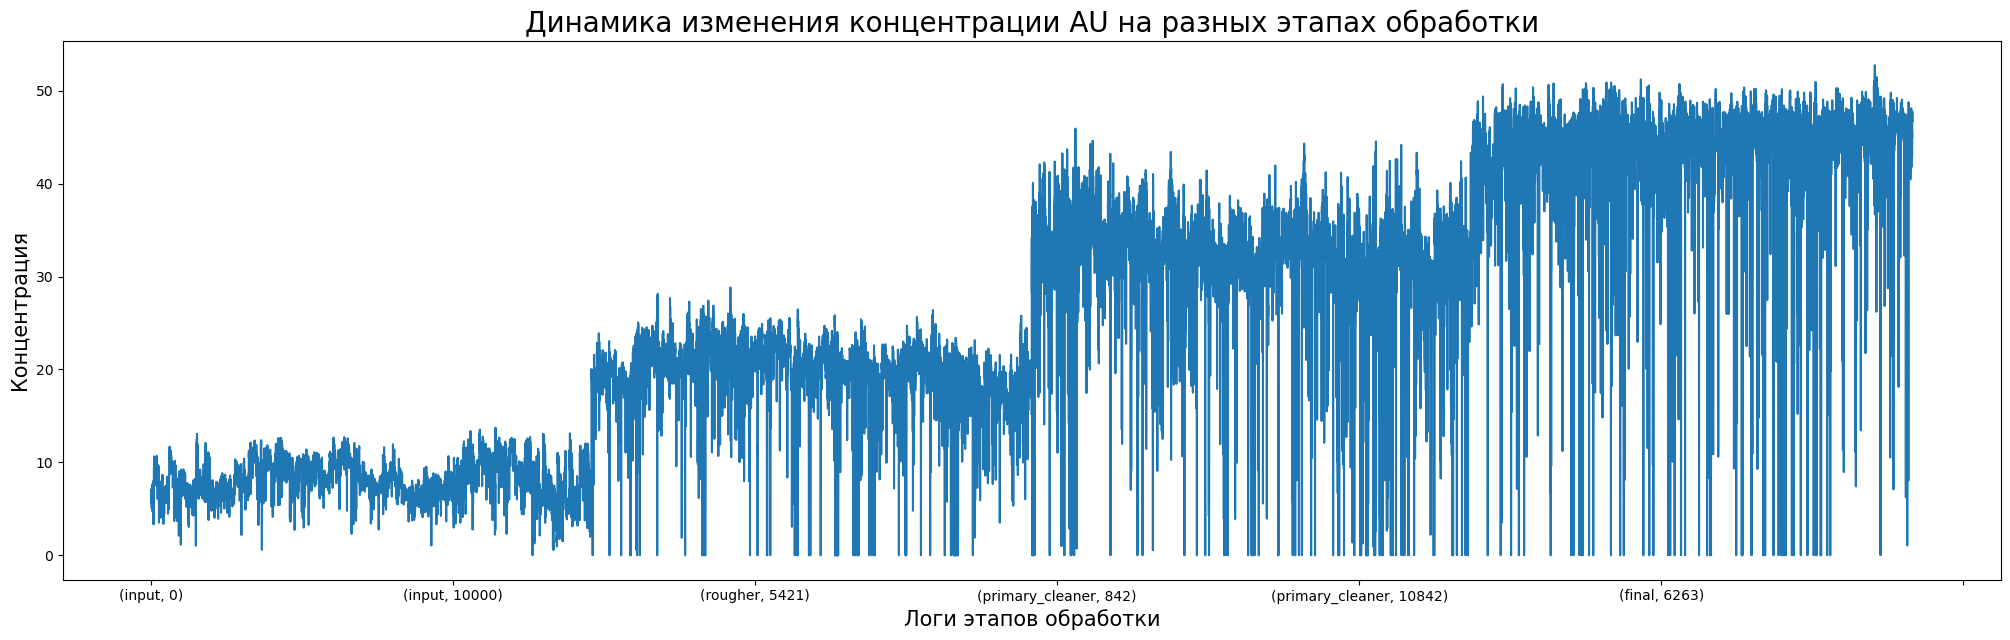

In [32]:
AU.plot(figsize=(25, 7))
plt.title('Динамика изменения концентрации AU на разных этапах обработки', fontsize=20)
plt.ylabel('Концентрация', fontsize=15)
plt.xlabel('Логи этапов обработки', fontsize=15);

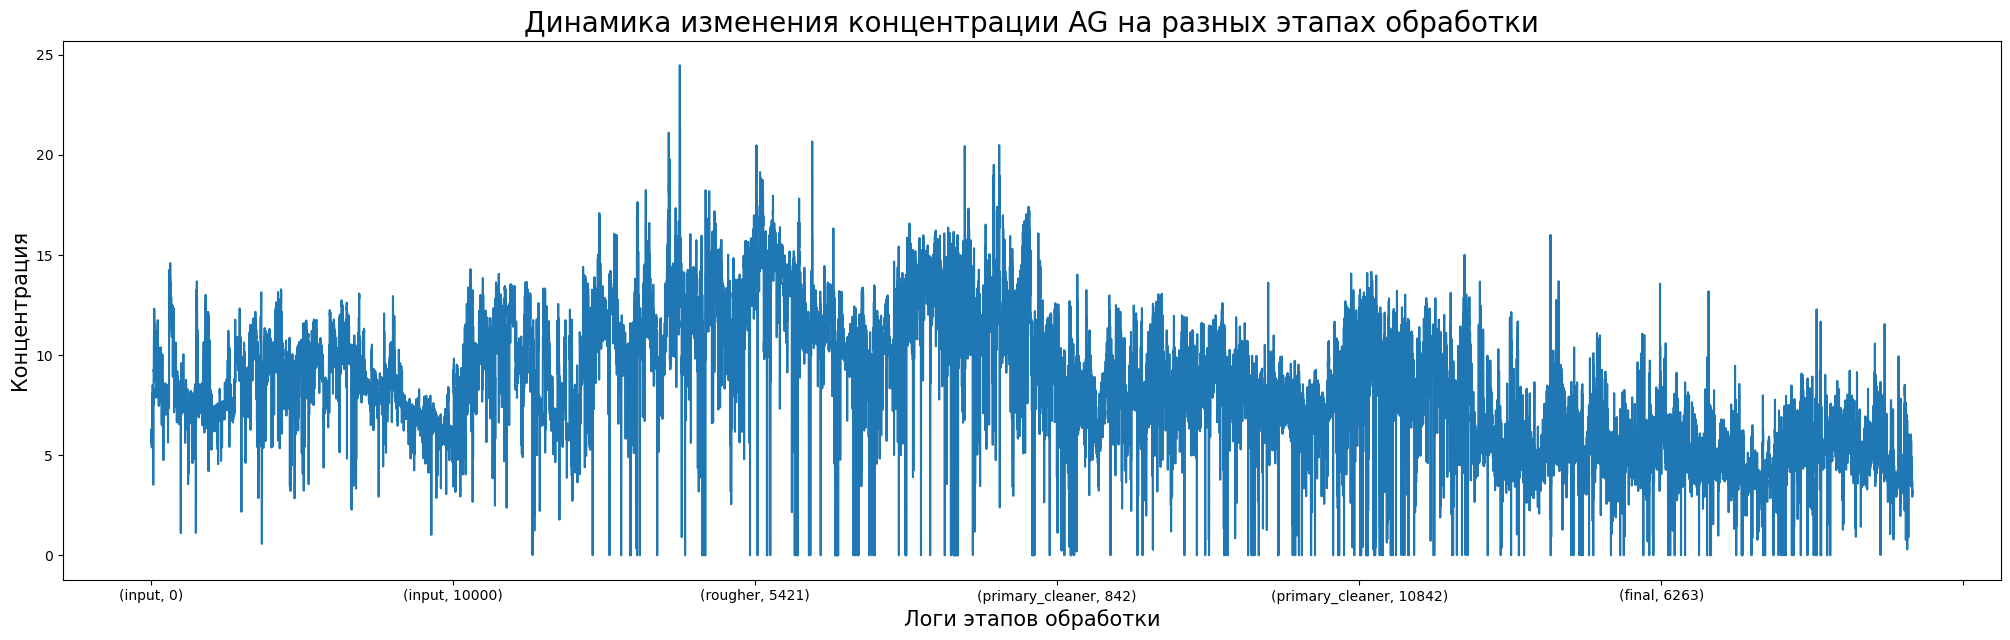

In [33]:
AG.plot(figsize=(25, 7))
plt.title('Динамика изменения концентрации AG на разных этапах обработки', fontsize=20)
plt.ylabel('Концентрация', fontsize=15)
plt.xlabel('Логи этапов обработки', fontsize=15);

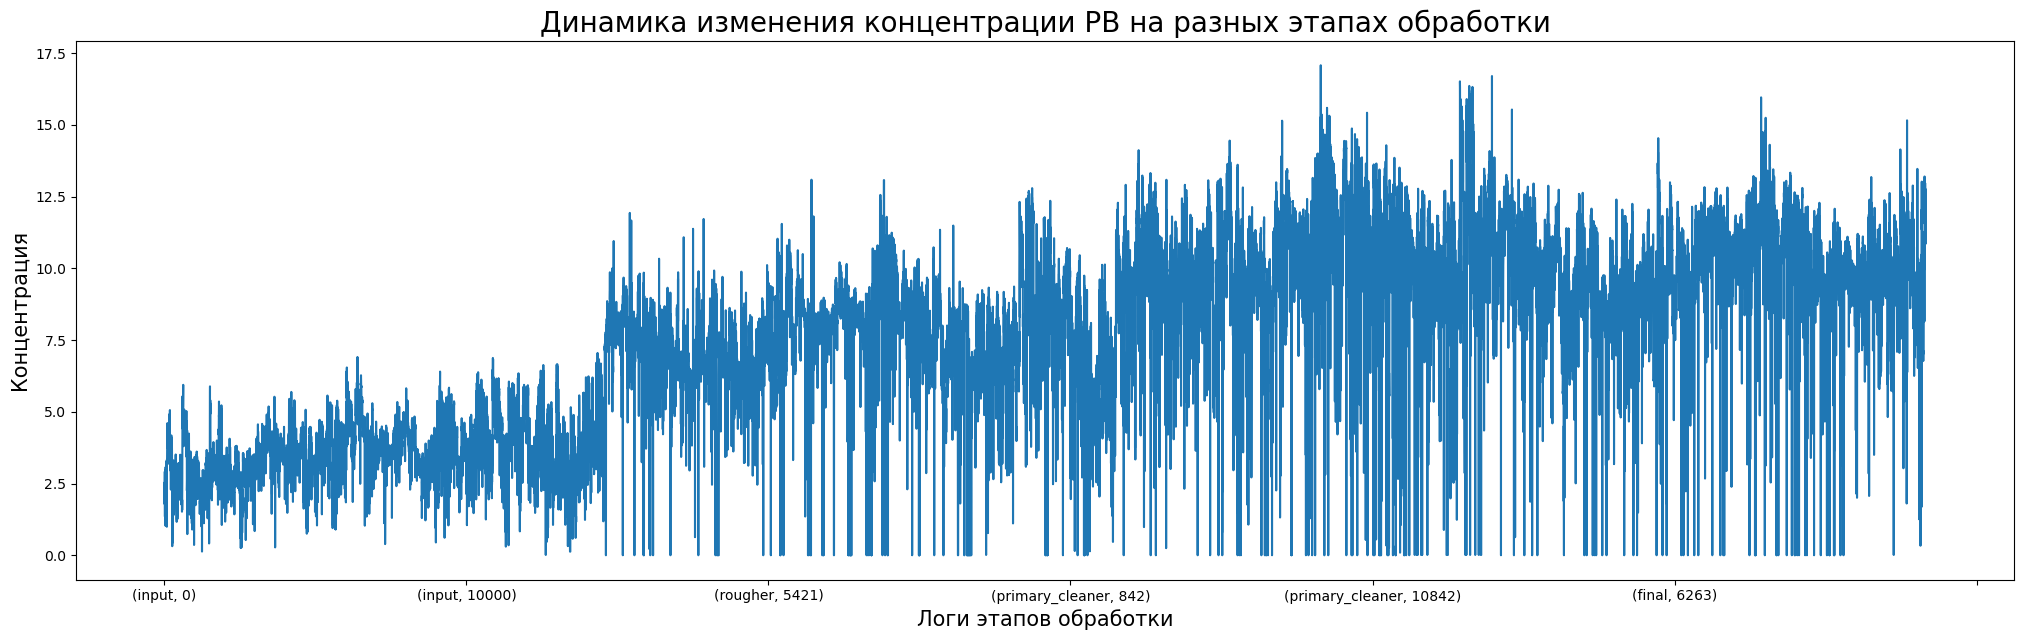

In [34]:
PB.plot(figsize=(25, 7))
plt.title('Динамика изменения концентрации PB на разных этапах обработки', fontsize=20)
plt.ylabel('Концентрация', fontsize=15)
plt.xlabel('Логи этапов обработки', fontsize=15);

**Можно сделать вывод**, что концентрация AU с каждым этапом обработки становится только больше, что соответствует логике всего процесса, ведь и пытаемся с каждым этапом увеличить концентрацию данного метала. 

PB нужен для того, чтобы удалять примеси из AU путем легирования, именно поэтому его концентрация тоже постепенно растет. 

AG является побочным металлом при добыче золота, поэтому чем ближе к конечному этапу, тем меньше его становится, так как он никак не помогает увеличить концентрацию AU. 

In [35]:
rougher_input_concentrate = df_train[['rougher.input.feed_au', 
                                      'rougher.input.feed_ag', 
                                      'rougher.input.feed_pb']]
rougher_input_concentrate.columns = ['Начальная концентрация AU', 'Начальная концентрация AG', 'Начальная концентрация PB']

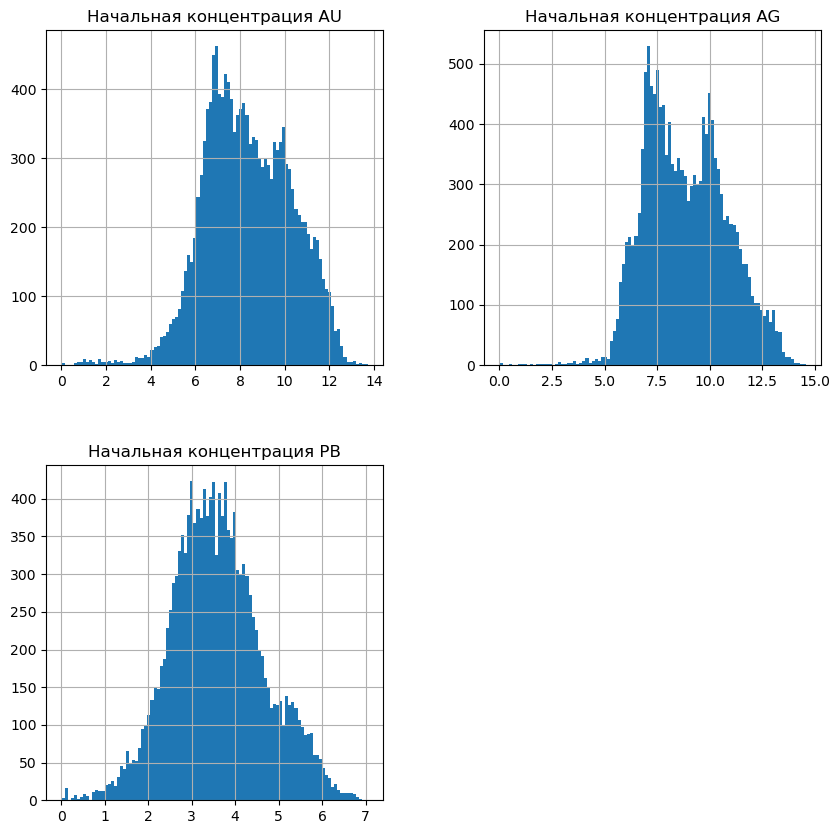

In [36]:
rougher_input_concentrate.hist(figsize=(10, 10), bins=100);

In [37]:
rougher_output_concentrate = df_train[['rougher.output.concentrate_au', 
                                       'rougher.output.concentrate_ag', 
                                       'rougher.output.concentrate_pb']]
rougher_output_concentrate.columns = ['Концентрация AU после флотации', 
                                      'Концентрация AG после флотации', 
                                      'Концентрация PB после флотации']

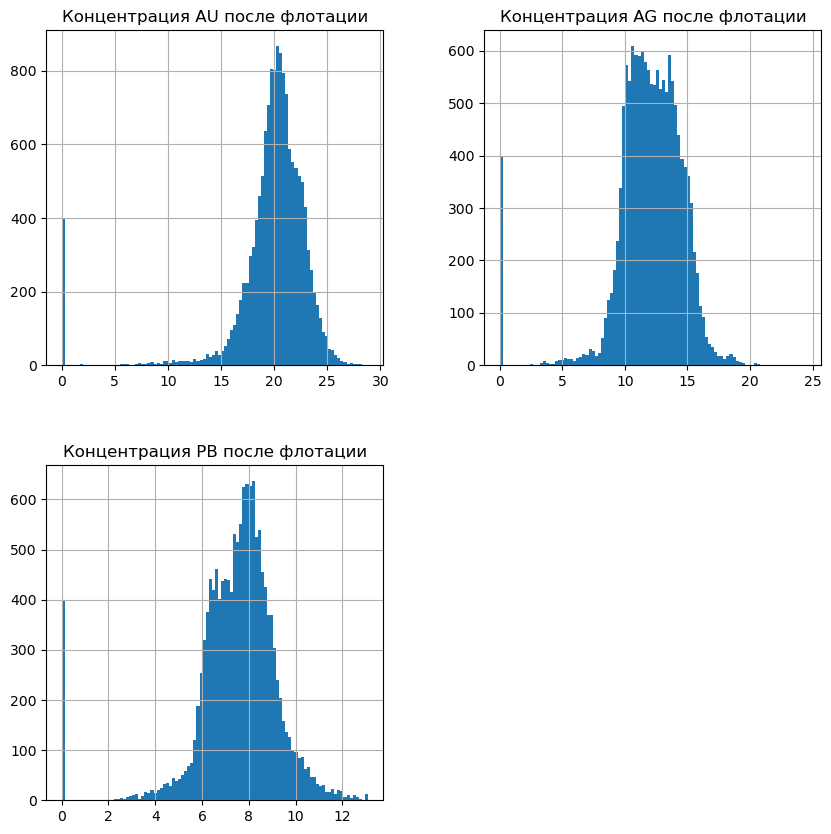

In [38]:
rougher_output_concentrate.hist(figsize=(10, 10), bins=100);

In [39]:
primary_cleaner_concentrate = df_train[['primary_cleaner.output.concentrate_au', 
                                        'primary_cleaner.output.concentrate_ag', 
                                        'primary_cleaner.output.concentrate_pb']]
primary_cleaner_concentrate.columns = ['Концентрация AU после первого этапа очистки', 
                                       'Концентрация AG после первого этапа очистки', 
                                       'Концентрация PB после первого этапа очистки']

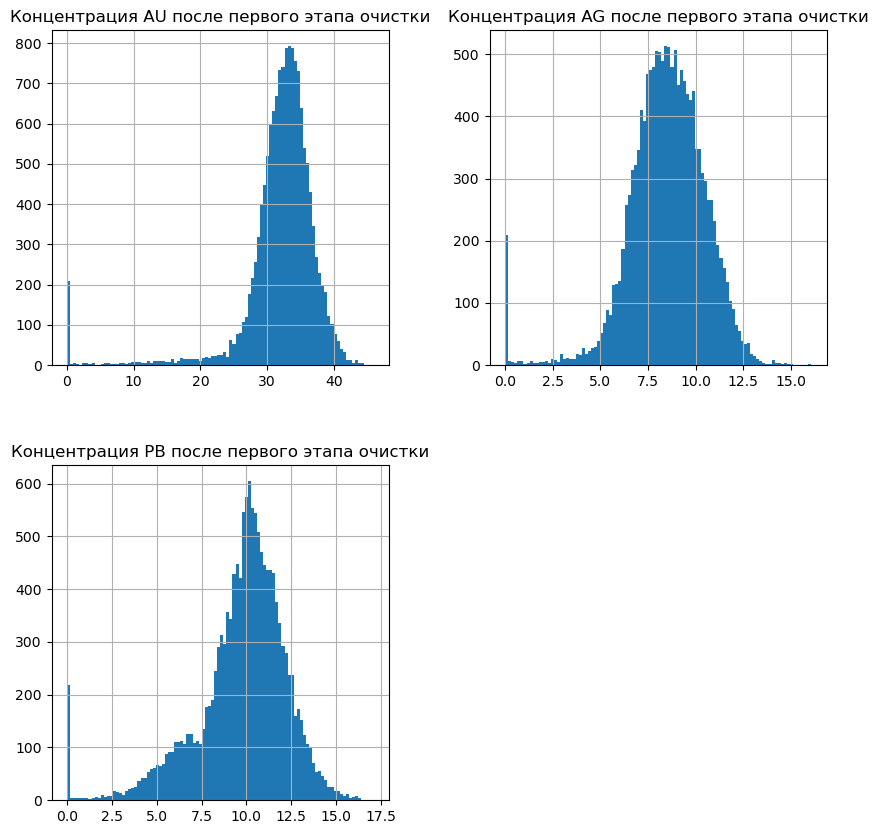

In [40]:
primary_cleaner_concentrate.hist(figsize=(10, 10), bins=100);

In [41]:
final_concentrate = df_train[['final.output.concentrate_pb', 
                              'final.output.concentrate_au', 
                              'final.output.concentrate_ag']]
final_concentrate.columns = ['финальная концентрация pb', 'финальная концентрация au', 'финальная концентрация ag']

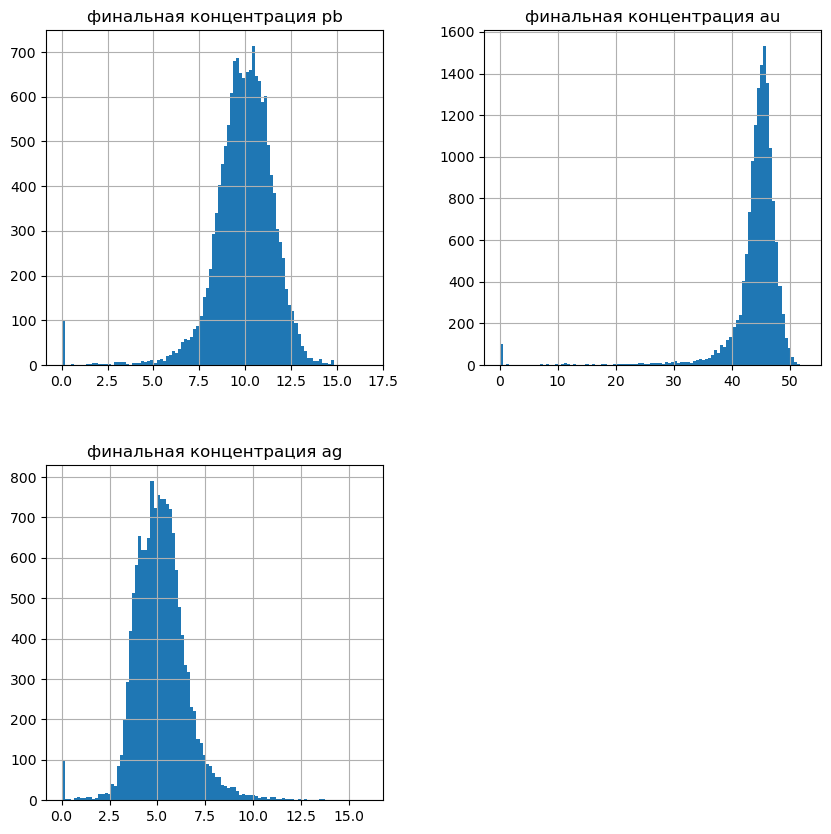

In [42]:
final_concentrate.hist(figsize=(10, 10), bins=100);

#### Вывод:
Видим, что распределение одних и тех же металлов на разных этапах очистки схожи! Это соответствует действителльности, ведь содержание металлов на разных этапах пропорциональны.

### Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках

Посмотрим для начала на гистограммы для двух выборок

<Axes: >

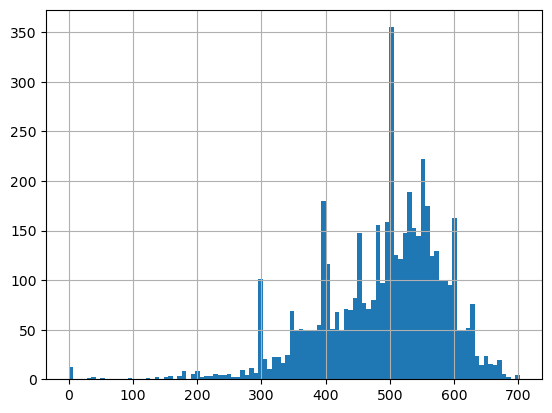

In [43]:
df_test['rougher.input.feed_rate'].hist(bins=100)

<Axes: >

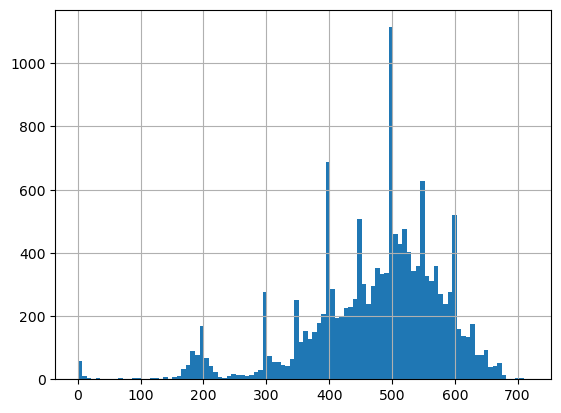

In [44]:
df_train['rougher.input.feed_rate'].hist(bins=100)

На глаз распределения сильно похожи, однако надо проверить лучше, ведь размеры датасетов разные, чтобы точно не ошибиться, посмотрим что нам выведет describe()

In [45]:
print(df_train['rougher.input.feed_rate'].describe())
df_test['rougher.input.feed_rate'].describe()

count    14579.000000
mean       474.284502
std        108.540067
min          0.002986
25%        411.020607
50%        498.144696
75%        549.576867
max        717.508837
Name: rougher.input.feed_rate, dtype: float64


count    4860.000000
mean      490.309284
std        94.390944
min         0.012786
25%       434.099695
50%       502.118742
75%       555.642707
max       702.523396
Name: rougher.input.feed_rate, dtype: float64

Тут тоже все схоже, чтобы точно быть уверенным, надо рассчитать U-критерий Манна — Уитни. U-критерий Манна — Уитни сравнивает медиану двух распределений.

`Нулевая гипотеза` -- две группы имеют одинаковое распределение

`Альтернативная гипотеза` -- одна группа имеет большие (или меньшие) значения, чем другая.

In [46]:
alpha = .05

stat, p_value = mannwhitneyu(df_train.loc[:df_test.shape[0], 'rougher.input.feed_rate'], 
                             df_test['rougher.input.feed_rate'])
print(f"Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value}")
if p_value < alpha:
    print('Ответргаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Mann–Whitney U Test: statistic=9706747.0000, p-value=2.6491404342893203e-52
Ответргаем нулевую гипотезу


Теперь проведем t-test

In [47]:
stat, p_value = ttest_ind(df_train.loc[:df_test.shape[0], 'rougher.input.feed_rate'], 
                             df_test['rougher.input.feed_rate'])
print(f"t-test: statistic={stat:.4f}, p-value={p_value}")
if p_value < alpha:
    print('Ответргаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

t-test: statistic=-13.0398, p-value=1.5288403052350867e-38
Ответргаем нулевую гипотезу


Получается, что распределения разные, также в добавок построил KDE и CDF, по последним можно сказать, что распределения гранул не сильно и различается в датасетах.

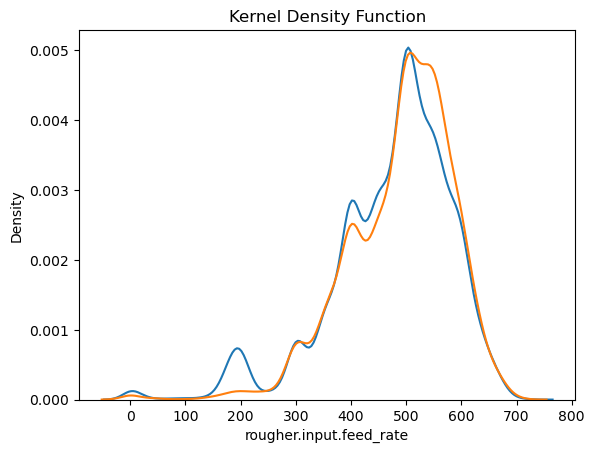

In [48]:
sns.kdeplot(x='rougher.input.feed_rate', data=df_train, common_norm=False, legend=True)
sns.kdeplot(x='rougher.input.feed_rate', data=df_test, common_norm=False, legend=True)
plt.title("Kernel Density Function");

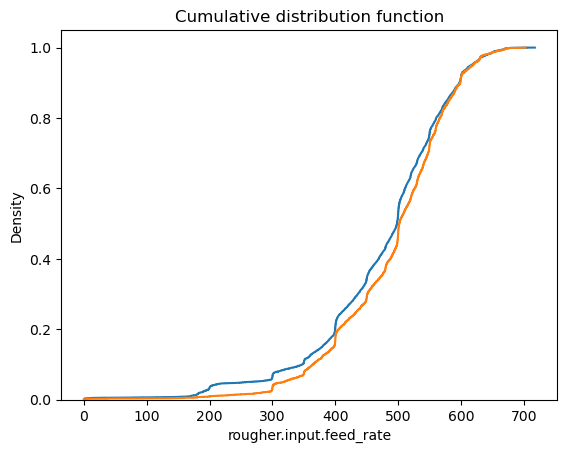

In [49]:
sns.histplot(x='rougher.input.feed_rate', data=df_train, bins=len(df_train), stat="density",
      element="step", fill=False, cumulative=True, common_norm=False)
sns.histplot(x='rougher.input.feed_rate', data=df_test, bins=len(df_test), stat="density",
      element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function");

### Исследование суммарной концентрации металлов на разных стадиях: 
в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [ ]:
rougher_input_metals = df_train[['rougher.input.feed_au', 
                                 'rougher.input.feed_ag', 
                                 'rougher.input.feed_pb']].apply(sum, axis=1)

rougher_output_metals = df_train[['rougher.output.concentrate_au', 
                                  'rougher.output.concentrate_ag', 
                                  'rougher.output.concentrate_pb']].apply(sum, axis=1)

primary_filter_metals = df_train[['primary_cleaner.output.concentrate_au', 
                                  'primary_cleaner.output.concentrate_ag', 
                                  'primary_cleaner.output.concentrate_pb']].apply(sum, axis=1)

final_metals = df_train[['final.output.concentrate_pb', 
                         'final.output.concentrate_au', 
                         'final.output.concentrate_ag']].apply(sum, axis=1)

In [ ]:
metals_dinamic = concatanation(rougher_input_metals, 
                               rougher_output_metals, 
                               primary_filter_metals, 
                               final_metals)
metals_dinamic.plot(figsize=(15, 7));
plt.ylabel('Концентрация')
plt.xlabel('Этапы обработки')
plt.title('Динамика изменения общей концентрации металлов в руде', fontsize=15);


Однако мы видим много нулевых и около нулевых значений концентрации, их стоит убрать из обучающий данных:

In [ ]:
concentrates_data = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.output.concentrate_au', 
                     'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 
                     'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 
                     'final.output.concentrate_au', 'final.output.concentrate_ag']
for col in concentrates_data:
    df_train = df_train.loc[df_train[col] > df_train[col].mean() - 3*df_train[col].std()]

#### Вывод:
Концентрация металлов постепенно увеличивается с каждым этапом обработки.

## Построение модели

### Функция для вычисления итоговой sMAPE

In [ ]:
def sMAPE(target, predict):
    top = 2 * np.abs(target - predict)
    under = np.abs(target) + np.abs(predict)
    under = list(map(lambda x: x if x != 0 else 0.0001, under))
    s = np.sum(top / under)
    return s / len(target) * 100

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `sMAPE` расчитана верно.</font>

Проведем тесты, создадим какой-нибудь небольшой набор данных и посчитаем sMAPE вручную и с помощью программы:

In [ ]:
x = np.array([12, 13, 14, 15, 15])
y = np.array([11, 13, 14, 14, 15])

sMAPE(x, y)

In [ ]:
.2 * ((abs(12 - 11) * 2) / (12 + 11) +
      (abs(13 - 13) * 2) / (13 + 13) + 
      (abs(14 - 14) * 2) / (14 + 14) + 
      (abs(15 - 14) * 2) / (15 + 14) +
      (abs(15 - 15) * 2) / (15 + 15)) * 100

#### Вывод:
функция работает корректно!

### Обучение моделей и оценка их качества кросс-валидацией

Подготовим данные и нужные метрики

In [ ]:
first_target = df_train['rougher.output.recovery']
second_target = df_train['final.output.recovery']
features = df_train.drop(['day', 'date', 'year', 'month', 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_sol', 'rougher.output.concentrate_pb', 'final.output.recovery',
 'secondary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio', 'final.output.concentrate_au',
 'rougher.output.recovery', 'final.output.tail_ag', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au',
 'rougher.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_sol',
 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol', 'final.output.tail_pb', 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_ag',
 'rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_au', 'rougher.output.tail_au'], axis=1)

# я не понимаю почему я не могу передать в .drop() просто массив feat_categories, у меня почему-то вылезает ошибка на весь экран
scaler = StandardScaler()
scaler.fit(features)

features = scaler.transform(features)
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

**Модели для `rougher.output.recovery`**

Для начала расмотрим RandomForestRegressor. Используем GridsearchCV:

In [ ]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [8, 16, None]
}

параметров можно было указать больше, но у меня ноутбук не тянет столько переборов

In [ ]:
%%time

model = RandomForestRegressor(random_state=state, n_jobs=-1)
grid_search = GridSearchCV(model, params, cv=5, scoring=smape_scorer)
grid_search.fit(features, first_target)

grid_search.best_score_ * (-1)

In [ ]:
grid_search.best_params_

In [ ]:
print('RandomForestRegressor')
print(f'sMAPE-метрка для тренировочный выборки: {round(grid_search.best_score_ * (-1), 4)}')

In [ ]:
model_first_rfr = RandomForestRegressor(random_state=state, n_jobs=-1, **grid_search.best_params_)
model_first_rfr.fit(features, first_target)

Теперь возьмем модель линейной регрессии:

In [ ]:
model_first_lr = LinearRegression()
model_first_lr.fit(features, first_target)
sc = cross_val_score(model_first_lr, features, first_target, scoring=smape_scorer)

In [ ]:
print('Linear Regression')
print(f'sMAPE-метрка для тренировочный выборки: {round(sc.mean() * (-1), 4)}')

**Модели для `final.output.recovery`**

In [ ]:
model_second_lr = LinearRegression()
model_second_lr.fit(features, second_target)
sc = cross_val_score(model_second_lr, features, second_target, scoring=smape_scorer)

In [ ]:
print('Linear Regression')
print(f'sMAPE-метрка для тренировочный выборки: {round(sc.mean() * (-1), 4)}')

In [ ]:
%%time

model = RandomForestRegressor(random_state=state, n_jobs=-1)
grid_search = GridSearchCV(model, params, cv=5, scoring=smape_scorer)
grid_search.fit(features, second_target)

grid_search.best_score_ * (-1)

In [ ]:
%%time

model_second_rfr = RandomForestRegressor(random_state=state, n_jobs=-1, **grid_search.best_params_)
model_second_rfr.fit(features, second_target)
sc = cross_val_score(model_second_rfr, features, second_target, scoring=smape_scorer)

In [ ]:
print('RandomForestRegressor')
print(f'sMAPE-метрка для тренировочный выборки: {round(sc.mean() * (-1), 4)}')

**Константная модель**

In [ ]:
const_model_first = DummyRegressor(strategy='mean')
sc = cross_val_score(const_model_first, features, first_target, scoring=smape_scorer)
const_model_first.fit(features, first_target)

In [ ]:
print('Const_model')
print(f'sMAPE-метрка для тренировочный выборки: {round(sc.mean() * (-1), 4)}')

In [ ]:
const_model_second = DummyRegressor(strategy='mean')
sc = cross_val_score(const_model_second, features, second_target, scoring=smape_scorer)
const_model_second.fit(features, second_target)

In [ ]:
print('Const_model')
print(f'sMAPE-метрка для тренировочный выборки: {round(sc.mean() * (-1), 4)}')

Теперь проверим модели на тренировочном датасете

Для начала рассмотрим первый признак

In [ ]:
features_test = df_test.drop(['date', 'year', 'month', 'day'], axis=1)
features_test = scaler.transform(features_test)

In [ ]:
predict_test_first_lr = model_first_lr.predict(features_test)
predict_test_first_rfr = model_first_rfr.predict(features_test)
predict_test_first_const = const_model_first.predict(features_test)

In [ ]:
first_test_target = df_full.iloc[-4860:]['rougher.output.recovery'].reset_index(drop=True)

In [ ]:
score_first_lr = sMAPE(first_test_target, predict_test_first_lr)
print(f'sMAPE-метрика для тестовой выборки с использованием линейной регресии для первого признака: {round(score_first_lr, 4)}')

In [ ]:
score_first_rfr = sMAPE(first_test_target, predict_test_first_rfr)
print(f'sMAPE-метрика для тестовой выборки с использованием случайного леса для первого признака: {round(score_first_rfr, 4)}')

In [ ]:
score_first_const = sMAPE(first_test_target, predict_test_first_const)
print(f'sMAPE-метрика для тестовой выборки с использованием константной модели для первого признака: {round(score_first_const, 4)}')

Теперь рассмотрим второй признак

In [ ]:
second_test_target = df_full.iloc[-4860:]['final.output.recovery'].reset_index(drop=True)

In [ ]:
predict_test_second_lr = model_second_lr.predict(features_test)
predict_test_second_rfr = model_second_rfr.predict(features_test)
predict_test_second_const = const_model_second.predict(features_test)

In [ ]:
score_second_lr = sMAPE(second_test_target, predict_test_second_lr)
score_second_rfr = sMAPE(second_test_target, predict_test_second_rfr)
score_second_const = sMAPE(second_test_target, predict_test_second_const)

In [ ]:
print(f'sMAPE-метрика для тестовой выборки с использованием линейной регресии для второго признака: {round(score_second_lr, 4)}')

In [ ]:
print(f'sMAPE-метрика для тестовой выборки с использованием линейной регресии для второго признака: {round(score_second_rfr, 4)}')

In [ ]:
print(f'sMAPE-метрика для тестовой выборки с использованием константной модели для вторго признака: {round(score_second_const, 4)}')

In [ ]:
final_sMAPE = .25 * min(score_first_lr, score_first_rfr) + .75 * min(score_second_lr, score_second_rfr)

In [ ]:
final_sMAPE_const = .25 * score_first_const + .75 * score_second_const

In [ ]:
print(f'Итоговая метрика для константной модели: {round(final_sMAPE_const, 4)}')

In [ ]:
print(f'Итоговая метрика: {round(final_sMAPE, 4)}')

#### Вывод: 
Итоговая метрика получилась примерно 6%. Удовлетворительный результат по сравнению с константной моделью, там итоговая метрика составила 8,4%. По итогу, самая лучшая модель -- случайный лес.

## Вывод:

По итогам всей работы можно сделать следующие выводы:
- Загрузили данные и подготовили их
- Проанализировали некоторые признаки и проверили на правильность расчета эффективности обогащения
- Написали функцию для вычисления итоговой sMAPE
- Нашли лучшие модели, таковыми оказалась линейная регрессия